<a href="https://colab.research.google.com/github/JossefaRodriguez/ExamenIII/blob/main/ExamenIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Importar librerias.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [33]:
# Conectar con Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# Importar el DataFrame.
path = "/content/drive/MyDrive/Colab Notebooks/Bootcamp/Actividades_CORE/Examen III/ds_salaries.csv"
df = pd.read_csv(path)

**Limpieza de datos con Python:**

- Detección y eliminación de valores duplicados: Asegúrate de que cada registro en el dataset sea único.

- Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

- Consistencia en valores categóricos: Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Junior’, ‘junior’, ‘JUNIOR’).

- Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.

- Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un salario anual de 1 millón de dólares para un puesto de entrada).

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [36]:
# Usamos lower y replace para eliminar vacios y dejar en minusculas el nombre de las columnas en caso de no estarlas
df.columns = df.columns.str.lower().str.replace(" ","_")

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [55]:
# Se contabilizan valores nulos, no existen
df.isna().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [39]:
# Se realiza consulta para conocer valores duplicados. Según existirian 1171 valores duplicados
df.duplicated().value_counts()

,count
False,2584
True,1171


In [40]:
# Se revisa detalle de los valores duplicados
df[df.duplicated(keep=False)]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M
10,2023,SE,FT,Data Scientist,90700,USD,90700,US,0,US,M
11,2023,SE,FT,Data Analyst,130000,USD,130000,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3441,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
3502,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
3586,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
3665,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L


In [41]:
# Respecto a los valores duplicados se realiza una agrupación para ver cual es la frecuencia de duplicados por fila creando una columna llamada frecuencia
df[df.duplicated(keep=False)].groupby(df.columns.tolist()).size().reset_index(name='Frecuencia')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Frecuencia
0,2020,EN,FT,Data Engineer,1000000,INR,13493,IN,100,IN,L,2
1,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L,2
2,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L,2
3,2022,EN,FT,Data Analyst,50000,USD,50000,US,50,US,L,2
4,2022,EN,FT,Data Engineer,40000,GBP,49253,GB,100,GB,M,2
...,...,...,...,...,...,...,...,...,...,...,...,...
539,2023,SE,FT,Research Scientist,169200,USD,169200,ES,0,ES,M,2
540,2023,SE,FT,Research Scientist,200000,USD,200000,US,0,US,M,7
541,2023,SE,FT,Research Scientist,210000,USD,210000,US,0,US,M,3
542,2023,SE,FT,Research Scientist,250000,USD,250000,US,0,US,M,3


In [42]:
# Se realiza el borrado de los valores duplicados
df.drop_duplicates(inplace=True)

In [43]:
# Se comprueba el borrado
df.duplicated().sum()

np.int64(0)

In [56]:
# Se vuelve a consultar el df y además se verifica que los tipos de datos corresponden al diccionario
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


In [45]:
# Se revisa si existe alguna inconsistencia en los valores por cada columna, sim ebargo no se logra identificar ninguno.
var_work = df['work_year'].value_counts()
var_experience = df['experience_level'].value_counts()
var_employment = df['employment_type'].value_counts()
var_job = df['job_title'].unique()
var_salary = df['salary'].value_counts()
var_currency = df['salary_currency'].value_counts()
var_inusd = df['salary_in_usd'].value_counts()
var_res = df['employee_residence'].unique()
var_remote = df['remote_ratio'].value_counts()
var_location = df['company_location'].unique()
var_size = df['company_size'].value_counts()

print(f"{var_work}\n\n{var_experience}\n\n{var_employment}\n\n{var_job}\n\n{var_salary}\n\n{var_currency}\n\n{var_inusd}\n\n{var_res}\n\n{var_remote}\n\n{var_location}\n\n{var_size}")

work_year
2023    1156
2022    1125
2021     228
2020      75
Name: count, dtype: int64

experience_level
SE    1554
MI     664
EN     270
EX      96
Name: count, dtype: int64

employment_type
FT    2547
PT      17
CT      10
FL      10
Name: count, dtype: int64

['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Scie

In [46]:
# Se realiza la busqueda de datos anomalos, especificamente en los salarios, se sacaran los valores maximos del salario bruto y salario en dolares y se correlacionara con el nivel de experiencia
importe_dolares = df['salary_in_usd'].max()
importe_bruto = df['salary'].max()

print(importe_dolares, importe_bruto)

450000 30400000


In [47]:
"""
Entendiendo que según el diccionario el nivel de experiencia SE =	Semi Senior o Senior /
MI =Mid-level (intermedio) / EN = Entry-level(principiante) / EX	Executive / Experto se correlacionara
con el valor del salario maximo y el puesto laboral
"""
fil_salario = df[df['salary_in_usd'] >= 450000]

correlacion = fil_salario.groupby(['experience_level', 'job_title'])['salary_in_usd'].unique()
correlacion


,,salary_in_usd
experience_level,job_title,
MI,Research Scientist,[450000]


In [48]:
"""
Segun la busqueda anterior nos indica que el salario mas alto corresponde a un cientifico de datos,
por lo cual se consultará si existen más datos asociados a este job title y se analizará
si corresponde un salario aproximado a este.
"""
fil_1 = df[df['job_title'] == 'Research Scientist'].value_counts()
fil_2 = df[(df['job_title'] == 'Research Scientist') & (df['experience_level'] == 'MI') & (df['company_size'] == 'M')]['salary_in_usd'].mean().round(2)
print(fil_1, fil_2)

work_year  experience_level  employment_type  job_title           salary  salary_currency  salary_in_usd  employee_residence  remote_ratio  company_location  company_size
2020       EN                FT               Research Scientist  42000   USD              42000          NL                  50            NL                L               1
           MI                FT               Research Scientist  450000  USD              450000         US                  0             US                M               1
2021       EN                FT               Research Scientist  60000   GBP              82528          GB                  50            GB                L               1
                                                                  100000  USD              100000         JE                  0             CN                L               1
           MI                FT               Research Scientist  48000   EUR              56738          FR                 

In [ ]:
"""
Por medio de las consultas anteriores, se puede determinar que existe este dato en particular
de los montos por salario muy fuera de rango, porque según los filtros realizados el promedio
para el Research Scientist con un nivel de experiencia MI y que la compañia a la que le trabaje
tenga un tamaño M debiese promediar los 166.795 dolares, sin embargo esta persona esta recibiendo
mas del doble del promedio 450.000 dolares. Además segun lo observado en la consulta anterior
podemos ver que existe a lo menos un salario de 250.000 dolares en el mismo cargo en la misma locación,
con el mismo tamaño de empresa pero con un nivel de experiencia senior. Como es un solo caso, se determina dejar el valor en
el df, ya que no es posible determinar en la inmediates si es un error de tipeo, o si realmente corresponde lo que se deberá consultar
con las areas encargadas para determinar.
"""


**Exploración de datos con Python:**

- Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

- Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

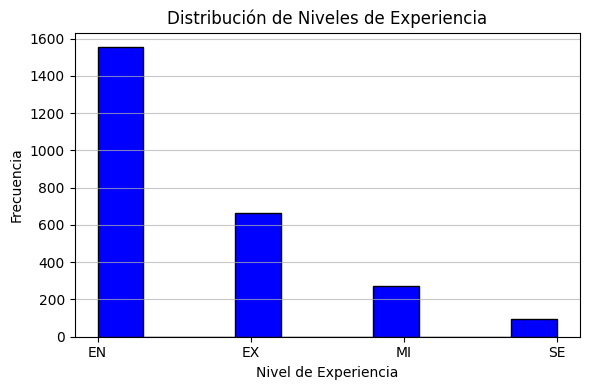

In [50]:
"""
Para generar la primera visualización exploratoria univariadas se utilizará
el histograma para los datos de la columna 'experience_level' la cual nos permitirá
visualizar la frecuencia de los nivel de experiencia
"""

# Se crear el histograma
plt.figure(figsize=(6, 4))
plt.hist(df['experience_level'], color='blue', edgecolor='black')

plt.title('Distribución de Niveles de Experiencia')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.7)

# Agregar etiquetas para los tipos de niveles
plt.xticks(ticks=range(len(df['experience_level'].unique())), labels=sorted(df['experience_level'].unique()))

# Se ajusta y muestra el grafico
plt.tight_layout()
plt.show()


**Analisis**

Según la distribución de los niveles de experiencia visualizados en este histograma podemos determinar que existen una concentración de empleados dentro del nivel de experiencia Principiante con un poco mas de 1500 registros. Seguido por nivel Expertos con alrrededor de 700 registros. y por debajo de los 300 registros tenemos los niveles intermedios y Senior. Estos datos demuestran que existe una dominancia de profesionales en sus primeras etapas lo que nos permite inferir que constantemente hay una constante incorporación de nuevos talentos en la insutria.

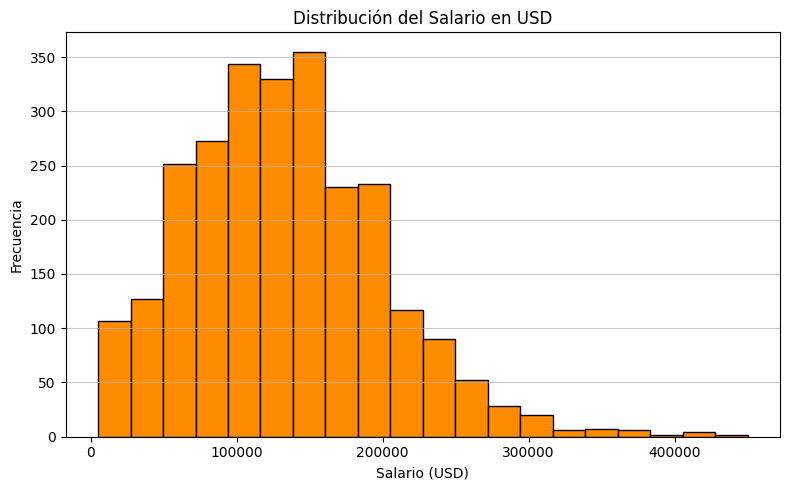

In [51]:
# Se crea el Histograma para la variable Salario en dolares con el objetivo de ver la distribución de estos datos

#Histograma
plt.figure(figsize=(8, 5))
plt.hist(df['salary_in_usd'], bins=20, color='darkorange', edgecolor='black')
plt.title('Distribución del Salario en USD')
plt.xlabel('Salario (USD)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.7)

# Se ajusta y muestra el gráfico
plt.tight_layout()
plt.show()

**Analisis**

Los datos visualizados en este histograma nos indican que la mayor concentración de sueldos se ubica entre los 50.000 y 150.000 dolares aproximados, desues de esto la frecuencia cae bruscamente lo que no indica que salarios sobre los 250.000 son muy bajos y sobre 400.000 casi nulos.

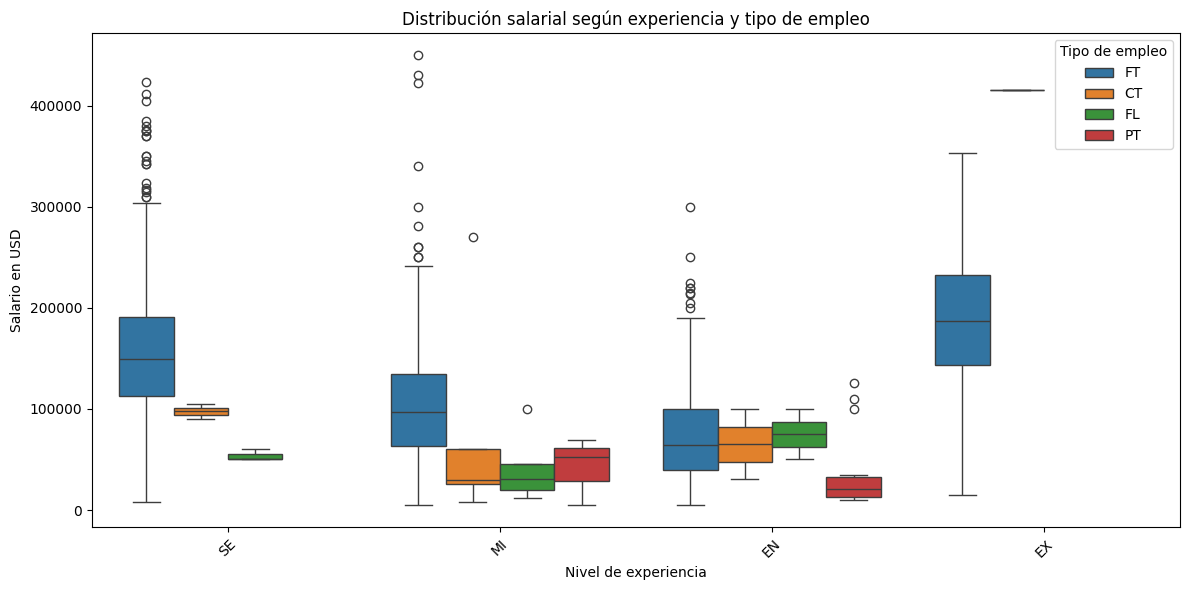

In [52]:
"""
Para las visualizaciones multivariables, se crea un boxplot para conocer el comportamiento de las variables, nivel de experiencia,
tipo de contrato y sueldo en dolares"
"""
# Se crea el grafico boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = 'experience_level', y = 'salary_in_usd', hue = 'employment_type')
plt.title('Distribución salarial según experiencia y tipo de empleo')
plt.ylabel('Salario en USD')
plt.xlabel('Nivel de experiencia')
plt.legend(title = 'Tipo de empleo')
plt.xticks(rotation = 45)
# Se ajusta y muestra el grafico
plt.tight_layout()
plt.show()

**Analisis**

Respecto a la visualización de este boxplot, se puede visualizar que los trabajadores con un nivel de experiencia "experto" y tipo de empleo full time mantienen sueldos más altos que por ejemplo los trabajadores con un nivel de experiencia Senior y tipo de empleo fulltime lo que se justifica claramente.
En el caso de el tipo de experiencia principiante los tipos de empleo, fulltime, con contrato y freelance, mantienen un promedio casi similar de sueldos a diferencia de los partime que es mucho mas bajo

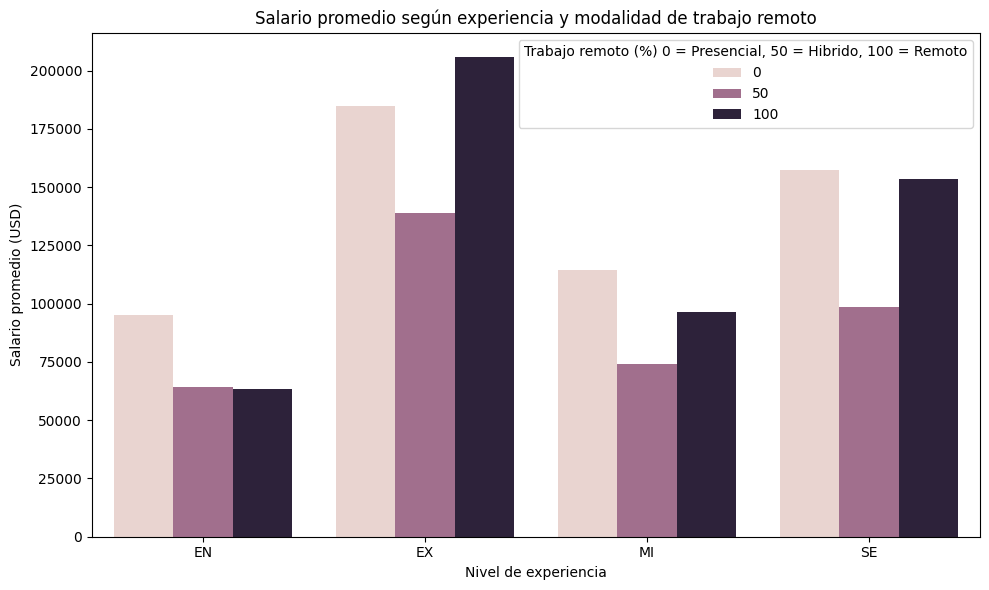

In [53]:
# Se creará un grafico de barra para comparar como varian los salarios según el n ivel de experiencia según modalidad de trabajos realizados de forma remota

# Se agrupan los datos
remoto = df.groupby(['experience_level', 'remote_ratio'])['salary_in_usd'].mean().reset_index()

# Se crea el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data = remoto, x = 'experience_level', y='salary_in_usd', hue='remote_ratio')
plt.title('Salario promedio según experiencia y modalidad de trabajo remoto')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Salario promedio (USD)')
plt.legend(title='Trabajo remoto (%) 0 = Presencial, 50 = Hibrido, 100 = Remoto')

#Se ajuste y muestra el grafico"
plt.tight_layout()
plt.show()

**Analisis**

Respecto a lo visualizado en el grafico de barras y entendiendo que la variable remote radio diferencia los tipos de modalidad de trabajo, podemos interpretar que en 3 de los 4 niveles de experiencia, el trabajo presencial mantiene los sueldos más altos, haciendo la diferencial el nivel experto que en en la modalidad remota, mantiene sueldoas mas altos.

**Análisis adicional:**

- Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.

- Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.

In [54]:
# Se realizaran calculos estadisticos de la variable sueldo en dolares (salary_in_usd) para posterior analisis

# Se crea el diccionario para el calculo de diferentes estadisticas
estadistica = df['salary_in_usd'].agg({
    'Media' : 'mean',
    'Mediana' : 'median',
    'Sueldo Maximo' : 'max',
    'Sueldo Minimo' : 'min',
    'Desviación' : 'std'
}).round()

print(estadistica)

Media            133409.0
Mediana          130000.0
Sueldo Maximo    450000.0
Sueldo Minimo      5132.0
Desviación        67137.0
Name: salary_in_usd, dtype: float64


**Analisis**

- Según los calculos realizados para los datos de la variables sueldo en dolares, pordemos determinar que existe una media y mediana cercana sin embargo el sueldo máximo está muy por encima de estos valores lo que indica que existen valores elevados poco común lo que concentra la distribución hacia la derecha, esto tambien se deterimna en el analisis realizado en pasos anteriores respecto a un dato mal ingresado posiblemente.
- En cuando a la desviación estandar existe una alta dispersión (0.50 calculo entre la media y la std) lo que nos indica que los salarios varian demasiado, pero esto lo podriamos interpretar por los niveles de experiencia, el cargo, el país, el tamaño de la compañia, entre otros.
- Y por ultimo el sueldo minimo está muy por debajo de los dueldos peromedios, lo que podriamos nuevamente interpretar como un valor erroneo o por cargos de tipo principiante.

**CONCLUSIONES GENERALES**

- Podemos determinar a partir del analisis realizado que existe una alta relación entre lo que a salario y experiencia trata, a mayor experiencia, mayor serán los montos de los salarios.
- Respecto a los de la modalidad de trabajo y el salario, según los datos se puede determinar que existen montos altos de salario involucrados en el trabajo presencial, más que en el hibrido o el remoto, teniendo solo un margen de diferencia.
- Existe una alta disperción respecto a los salarios, pero esto se justifica con los diversos cargos, niveles de experiencias, tamaños de compañias o empresas y lugares de residencia o laborales.
-Por ultimo existe una distribución mas bien asimetrica ya que existen pocos cargos que mantienen sueldos con valores por sobre el promedio lo que se podría interpretar como valores anormales como se analizo en un punto anterior o porque quizás alguna caracteristica no identificada genera esa valoración.